<h1  align="center"> NLP Basics - sentiment identification from IMDB movie review </h1>

In this notebook we will be studying about the basics of Natural language processing and how to  solve for sentiment analysis and prediction from imdb moview reviews. Below are the topics we will be covering in this notebook:

1. **Data Cleaning**
2. **Tokenization**
3. **Lemmatization/Stemming**
4. **POS Tagging**
5. **Word Embeddings**
6. **Vectorization**
7. **Training a model**
8. **Inference**

## About the dataset

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

### Loading requried data and libraries

In [2]:
!pip install wordcloud

In [3]:
import os
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import regex as re
from string import punctuation
import math

import nltk
nltk.download("omw-1.4")
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


In [4]:
data = pd.read_csv(r"D:\StateStreet\Continuous_Learning\Moview_Review\IMDB_Dataset\IMDB Dataset.csv")

### Looking into the data

In [5]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Data Cleaning

Data cleaning is a task of removing unwanted data that could affect our final prediction as well removing  null values.
Null values are basically "no value" as in no value is maintained for a specific field.
Data cleaning includes:
1. Removing Null values
2. Removing duplicate values
3. Lowering text to normalize the text
4. Removing Punctuations from string. (Punctuations - !"#$\%&'()*+,-\./:;<=>?@[\\]^_`{|}~)
5. Removing stopwords from string. Stopwords are words which are present in abundance in string and can be tricky for some models to learn from the words which have higher impact. For example "in", "at", "the", "a",etc.


In [9]:
data[data['review'].duplicated() == True]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [10]:
data.drop_duplicates(subset='review', inplace=True)

In [11]:
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [12]:
def remove_punc(series):
    temp = re.sub(f'[{punctuation}]', '', series)
    temp = re.sub(' br br ',' ', temp)
    temp = re.sub(' n ',' ', temp)
    return temp

data['review'] = data['review'].apply(remove_punc)

In [13]:
data[['review']].head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production The filming tech...
2,I thought this was a wonderful way to spend ti...
3,Basically theres a family where a little boy J...
4,Petter Matteis Love in the Time of Money is a ...


In [14]:
def remove_stop(series):
    return ' '.join([x.lower() for x in series.split(' ') if x.lower() not in STOPWORDS])

data['review'] = data['review'].apply(remove_stop)

In [15]:
data[['review']]

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...


## Tokenization

Tokenization is converting data into small tokens. In case of natural language, string of text is divided into substrings. Those substrings could be:
1. Words (Word level tokenization)
<p>
Eg: String- "My name is Kirti"
tokens- ["My", "name", "is", "Kirti"]
</p>
2. Letters (Char level tokenization)
<p>
Eg: String- "My name is Kirti"
tokens- ["M","y"," ","n","a","m","e"," ","i","s"," ","K","i","r","t","i"]
</p>
3. N-grams
    1. Bi-grams 
    <p>
    Eg: String- "My name is Kirti"
    tokens- ((My, name),(name, is),(is, Kirti))
    </p>
    2. Tri-grams
    <p>
    Eg: String- "My name is Kirti"
    tokens- ((My, name, is),(name, is, Kirti))
    </p>
    3. ..
4. Sentences (Sentence level tokenization)
<p>
Eg: String- "My name is Kirti I am an NLP Engineer."
tokens- ["My name is Kirti","I am an NLP Engineer."]
</p>

Here, we will be tokenizing using word tokenizer from nltk (Natural Language tool kit) package.

LookupError:  **********************************************************************   Resource punkt_tab not found.   Please use the NLTK Downloader to obtain the resource:    >>> import nltk   >>> nltk.download('punkt_tab')

In [17]:
import nltk
nltk.download('punkt_tab')   

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [18]:
def tokenize(series):
    return word_tokenize(series)

data['tokens'] = data['review'].apply(tokenize)

In [19]:
def get_len(series):
    return len(series)

data['token_len'] = data['tokens'].apply(get_len)

In [20]:
data[['tokens','token_len']].head()

,tokens,token_len
0,"[one, reviewers, mentioned, watching, 1, oz, e...",167
1,"[wonderful, little, production, filming, techn...",84
2,"[thought, wonderful, way, spend, time, hot, su...",88
3,"[basically, theres, family, little, boy, jake,...",71
4,"[petter, matteis, love, time, money, visually,...",128


In [21]:
data.describe()

,token_len
count,49582.000000
mean,120.137268
std,90.716578
min,3.000000
25%,64.000000
50%,89.000000
75%,146.000000
max,1432.000000


### Padding

Padding reffers to padding the sequeneces so that every sequenece is of same length. Padding includes 2 possible actions:

1. Adding padded value
2. Truncating sequence to required length

After tokenization, in order to maintain same length for every sequence of tokens either a value is added at end or at the begging of the sequence to increase the length or the sequence is truncated to the length by removing the tokens either from the end or from the start.

In [22]:
MAX_LEN = math.ceil(data.describe().values[1])
print(MAX_LEN)

121


C:\Users\hp\AppData\Local\Temp\ipykernel_1764\3958916300.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MAX_LEN = math.ceil(data.describe().values[1])


In [23]:
def pad_token(series):
    if len(series) < MAX_LEN:
        series.extend(['<END>']*(MAX_LEN-len(series)))
        return series
    else:
        return series[:MAX_LEN]

data['paded_tokens'] = data['tokens'].apply(pad_token)

In [24]:
print(data['paded_tokens'].values[10])

['phil', 'alien', 'one', 'quirky', 'films', 'humour', 'based', 'around', 'oddness', 'everything', 'rather', 'actual', 'punchlinesbr', 'br', 'first', 'odd', 'pretty', 'funny', 'movie', 'progressed', 'didnt', 'find', 'jokes', 'oddness', 'funny', 'anymorebr', 'br', 'low', 'budget', 'film', 'thats', 'never', 'problem', 'pretty', 'interesting', 'characters', 'eventually', 'lost', 'interestbr', 'br', 'imagine', 'film', 'appeal', 'stoner', 'currently', 'partakingbr', 'br', 'something', 'similar', 'better', 'try', 'brother', 'another', 'planet', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>', '<END>

In [25]:
data[['tokens','paded_tokens']]

,tokens,paded_tokens
0,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewers, mentioned, watching, 1, oz, e..."
1,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, theres, family, little, boy, jake,...","[basically, theres, family, little, boy, jake,..."
4,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,..."
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...","[thought, movie, right, good, job, wasnt, crea..."
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,"[catholic, taught, parochial, elementary, scho...","[catholic, taught, parochial, elementary, scho..."
49998,"[im, going, disagree, previous, comment, side,...","[im, going, disagree, previous, comment, side,..."


### Normalization

For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

To cater the above situation the most common approaches are:

1. Lemmatizing
2. Stemming





---

### 🔍 Stemming
- **Definition**: Stemming chops off word endings to get to the root form, often using crude heuristics.
- **Example**:
  - `"running"` → `"run"`
  - `"flies"` → `"fli"`
- **Pros**:
  - Fast and simple.
  - Useful when exact root form isn't critical.
- **Cons**:
  - Can produce non-dictionary words.
  - May reduce accuracy in downstream tasks.

**Popular Algorithms**:
- Porter Stemmer
- Snowball Stemmer
- Lancaster Stemmer

---

### 🧠 Lemmatization
- **Definition**: Lemmatization uses vocabulary and morphological analysis to return the dictionary form (lemma) of a word.
- **Example**:
  - `"running"` → `"run"`
  - `"better"` → `"good"`
- **Pros**:
  - Produces valid words.
  - More accurate and context-aware.
- **Cons**:
  - Slower and more resource-intensive.
  - Requires part-of-speech tagging for best results.

**Common Tools**:
- WordNet Lemmatizer (via NLTK)
- spaCy’s built-in lemmatizer

---

### ⚔️ Comparison Table

| Feature            | Stemming         | Lemmatization     |
|--------------------|------------------|-------------------|
| Output             | Root (may be invalid) | Dictionary word |
| Speed              | Fast             | Slower            |
| Accuracy           | Lower            | Higher            |
| Context Awareness  | No               | Yes               |
| Use Case           | Search engines, quick preprocessing | Text analysis, machine learning |




### Lemmatizing

Lemmatizing is the process of reducing words to their root forms such as mapping a group of words to the same lemma if the lemma itself is a valid word in the Language.

In [26]:
lemmatizer = WordNetLemmatizer()

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [30]:
def lemma(series):
    return [lemmatizer.lemmatize(word) for word in series]

data['lemma_tokens'] = data['paded_tokens'].apply(lemma)

In [31]:
data[['tokens','lemma_tokens']]

,tokens,lemma_tokens
0,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewer, mentioned, watching, 1, oz, ep..."
1,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, theres, family, little, boy, jake,...","[basically, there, family, little, boy, jake, ..."
4,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,..."
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...","[thought, movie, right, good, job, wasnt, crea..."
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,"[catholic, taught, parochial, elementary, scho...","[catholic, taught, parochial, elementary, scho..."
49998,"[im, going, disagree, previous, comment, side,...","[im, going, disagree, previous, comment, side,..."


### Stemming

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

In [32]:
stemmer = PorterStemmer()

In [33]:
def stem(series):
    return [stemmer.stem(word) for word in series]

data['stem_tokens'] = data['tokens'].apply(stem)

In [34]:
data[['tokens','stem_tokens']]

,tokens,stem_tokens
0,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y..."
1,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think..."
4,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st..."
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...","[thought, movi, right, good, job, wasnt, creat..."
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...","[bad, plot, bad, dialogu, bad, act, idiot, dir..."
49997,"[catholic, taught, parochial, elementary, scho...","[cathol, taught, parochi, elementari, school, ..."
49998,"[im, going, disagree, previous, comment, side,...","[im, go, disagre, previou, comment, side, malt..."


### POS Tagging

Part of Speech (POS) tagging refers to classifying words in a sentence into their part of speech. 

Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset.

In [36]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [38]:
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [39]:
def pos_t(series):
    return nltk.pos_tag(series, tagset='universal')

data['pos_tag_tokens'] = data['tokens'].apply(pos_t)

In [40]:
data[['tokens','pos_tag_tokens']]

,tokens,pos_tag_tokens
0,"[one, reviewers, mentioned, watching, 1, oz, e...","[(one, NUM), (reviewers, NOUN), (mentioned, VE..."
1,"[wonderful, little, production, filming, techn...","[(wonderful, ADJ), (little, ADJ), (production,..."
2,"[thought, wonderful, way, spend, time, hot, su...","[(thought, VERB), (wonderful, ADJ), (way, NOUN..."
3,"[basically, theres, family, little, boy, jake,...","[(basically, ADV), (theres, NOUN), (family, NO..."
4,"[petter, matteis, love, time, money, visually,...","[(petter, NOUN), (matteis, ADV), (love, ADJ), ..."
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...","[(thought, VERB), (movie, NOUN), (right, ADV),..."
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...","[(bad, ADJ), (plot, NOUN), (bad, ADJ), (dialog..."
49997,"[catholic, taught, parochial, elementary, scho...","[(catholic, ADJ), (taught, VERB), (parochial, ..."
49998,"[im, going, disagree, previous, comment, side,...","[(im, NOUN), (going, VERB), (disagree, ADJ), (..."


### Word Embeddings

Word embeddings describe a specific word with numbers. Pre-trained word embeddings is a game changer as they provide a push to the model.

Pre trained word embeddings could be contextual or non contextual

**Contextual word embeddings -** 

Word embeddings which are pre-trained in such way that the context of the sentence or string is taken into account.

**Non-contextual word embeddings -**

Word embeddings which are pre-trained without any context of the sentence or string is taken into account.

In [41]:
unique_words = set()
for tokens in list(data['lemma_tokens'].values):
    unique_words.update(tokens)

In [42]:
print('Count of Unique words:', len(unique_words))

Count of Unique words: 142547


In [43]:
word2idx = {}
for word in unique_words:
    word2idx[word] = len(word2idx)
word2idx['<END>'] = len(word2idx)

In [47]:
word_embeddings = np.random.rand(len(word2idx),200)
with open(r"D:\StateStreet\Continuous_Learning\Moview_Review\glove.6B.200d.txt\glove.6B.200d.txt", 'r',encoding='utf-8') as embeds:
    embeddings = embeds.read()
    embeddings = embeddings.split('\n')[:-2]
    
for token_idx, token_embed in enumerate(embeddings):
    token = token_embed.split()[0]
    if token in word2idx:
        word_embeddings[word2idx[token]] = [float(val) for val in token_embed.split()[1:]]

In [48]:
print(f'Word embeddings for word {list(word2idx.keys())[300]}:',word_embeddings[300])

Word embeddings for word ditch: [-0.0059039 -0.44752   -0.4802    -0.010882   0.20644    0.48457
 -0.22266   -1.1036     0.39953    0.19189   -0.22194   -0.54195
  0.15387   -0.034885   0.21243   -1.0793    -0.45162   -0.45761
  0.89549    0.54128    0.47025    1.6593    -0.22978    0.27772
  0.55285   -0.70287    0.48397    0.37092    0.17575   -0.71462
 -0.0072716  0.042589   0.40651    0.29877   -0.011979  -0.55599
  0.11284   -0.6577    -0.061658  -0.18691    0.48551    0.34866
  0.41354    0.26605    0.088853   0.39667   -0.8336    -0.22707
  0.30205    0.46818    0.28207   -0.18245    0.35359    0.50426
 -0.21      -0.32628   -0.3179    -0.20398   -0.12958    0.20922
  0.25552   -0.043892   0.13047   -0.13219   -0.21343    0.42387
  0.4253    -0.39461    0.27399   -0.43106   -0.13333    0.044938
  0.05713    0.048746   0.18996    0.37248    0.050753  -0.067011
 -0.1285    -0.20982    0.51611   -0.45568   -0.30194   -0.50081
  0.18144   -0.14739   -0.082377  -0.31567   -0.4716    

Now these word embeddings can be used in NLP models

### Vecotrization

Vectorization refers to converting textual data to numerical data/vectors. Vectorization of textual data can be done in multiple ways. Most common vectorizers are:

1. Bag of words (Count Vectorizer)
2. TF-IDF (Term Frequency inverse document frequency)
3. Custom vectorizers

In [50]:
vectorizer = CountVectorizer()

In [51]:
vector_cl = vectorizer.fit_transform([' '.join(tok) for tok in list(data['lemma_tokens'].values)])

In [52]:
vector_cl.shape

(49582, 141952)

#### Vecotrizing the lables

In [53]:
def label_vec(series):
    return int(series=='positive')

data['sentiment'] = data['sentiment'].apply(label_vec)

In [54]:
data[['lemma_tokens', 'sentiment']].head()

,lemma_tokens,sentiment
0,"[one, reviewer, mentioned, watching, 1, oz, ep...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, there, family, little, boy, jake, ...",0
4,"[petter, matteis, love, time, money, visually,...",1


### Identify and train Models

To identify the models, EDA needs to been done on the data. EDA helps in narrowing down the search space for model selection for training.

Since the current task is a binary classification problem we will just be using a logistic regression alogrithm for training. Many other models can be used to produce better results.

In [55]:
vector_cl_train_x, vector_cl_test_x, vector_cl_train_y, vector_cl_test_y = train_test_split(vector_cl, data['sentiment'].values, test_size=0.3, random_state=42)
print(vector_cl_train_x.shape,vector_cl_train_y.shape,vector_cl_test_x.shape,vector_cl_test_y.shape)

(34707, 141952) (34707,) (14875, 141952) (14875,)


In [56]:
log_reg = LogisticRegression().fit(vector_cl_train_x, vector_cl_train_y)

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split data
vector_cl_train_x, vector_cl_test_x, vector_cl_train_y, vector_cl_test_y = train_test_split(
    vector_cl, data['sentiment'].values, test_size=0.3, random_state=42)

print(vector_cl_train_x.shape, vector_cl_train_y.shape, vector_cl_test_x.shape, vector_cl_test_y.shape)

# Scale data
scaler = StandardScaler(with_mean=False)
vector_cl_train_x_scaled = scaler.fit_transform(vector_cl_train_x)
vector_cl_test_x_scaled = scaler.transform(vector_cl_test_x)

# Train Logistic Regression with increased max_iter
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(vector_cl_train_x_scaled, vector_cl_train_y)


(34707, 141952) (34707,) (14875, 141952) (14875,)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


### Inference

Inferences refers to the task fo generating results and inferences from the trained model.

In [61]:
pred = log_reg.predict(vector_cl_test_x)

In [62]:
print('Mean Accuracy:', log_reg.score(vector_cl_test_x, vector_cl_test_y))
print('F1 Score:', f1_score(vector_cl_test_y, pred))

Mean Accuracy: 0.615327731092437
F1 Score: 0.7152100338443161


In [63]:
print(log_reg.predict(vectorizer.transform(['This movie was one of the best i watched in recent times'])))
print(log_reg.predict(vectorizer.transform(['This movie was not bad and i really liked it.'])))
print(log_reg.predict(vectorizer.transform(['The cinematics of this movie made my eyes bleed'])))

[1]
[0]
[0]


### Wordcloud

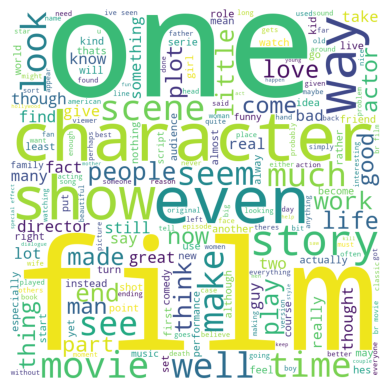

In [64]:
words = ' '.join(data['review'].values)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(words)
 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The inability of these classical machine learning models to identify the context of the text is the reason that Recurrent neural networks and transformer based models are the most widely used models for such tasks as they tend to understand the context of the text. 

Below we will be training a hugging face model.

### Hugging face model

In [66]:
!pip install datasets
   


   ---------------------------------------- 0/2 [multiprocess]
   -------------------- ------------------- 1/2 [datasets]
   -------------------- ------------------- 1/2 [datasets]
   -------------------- ------------------- 1/2 [datasets]
   -------------------- ------------------- 1/2 [datasets]
   -------------------- ------------------- 1/2 [datasets]
   ---------------------------------------- 2/2 [datasets]



In [69]:
!pip install evaluate


In [71]:
pip install huggingface_hub[hf_xet]

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.2 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 1.1 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.2 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.1 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.1 MB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.8 MB 964.6 kB/s eta 0:00:02
   -------------------------- ------------- 1.8/2.8 MB 949.7 kB/s eta 0:00:02
   ----------------------------- ---------- 2.1/2.8 MB 975.6 kB/s eta 0:00:01
   -------------------------------

In [74]:
!pip install tf-keras


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 641.3 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 723.9 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 723.9 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 722.4 kB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 722.4 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 708.8 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 708.8 kB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 716.9 kB/s  0:00:02


In [76]:
!pip install --upgrade datasets transformers


   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
    --------------------------------------- 0.3/12.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.0 MB 371.4 kB/s eta 0:00:31
   -- ------------------------------------- 0.8/12.0 MB 505.7 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/12.0 MB 505.7 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/12.0 MB 536.2 kB/s eta 0:00:21
   --- ------------------------------------ 1.0/12.0 M

In [2]:
!pip install --upgrade datasets fsspec


  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-experimental 0.6.2 requires pandas<2.3.0, but you have pandas 2.3.3 which is incompatible.
llama-index-readers-file 0.5.4 requires pandas<2.3.0, but you have pandas 2.3.3 which is incompatible.
s3fs 2025.3.2 requires fsspec==2025.3.2.*, but you have fsspec 2025.9.0 which is incompatible.


In [4]:
!pip install fsspec==2023.1.0


  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.9.0
    Uninstalling fsspec-2025.9.0:
      Successfully uninstalled fsspec-2025.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
huggingface-hub 0.35.3 requires fsspec>=2023.5.0, but you have fsspec 2023.1.0 which is incompatible.
llama-index-core 0.14.3 requires fsspec>=2023.5.0, but you have fsspec 2023.1.0 which is incompatible.
llama-index-experimental 0.6.2 requires pandas<2.3.0, but you have pandas 2.3.3 which is incompatible.
llama-index-readers-file 0.5.4 requires pandas<2.3.0, but you have pandas 2.3.3 which is incompatible.
s3fs 2025.3.2 requires fsspec==2025.3.2.*, but you have fsspec 2023.1.0 which is incompatible.


In [6]:
import numpy as np
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding, TFAutoModelForSequenceClassification
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import evaluate  # Use this instead of load_metric

# Load dataset
imdb = load_dataset("imdb", download_mode="force_redownload")

train_dataset = imdb["train"].shuffle(seed=42).select(range(10000))
test_dataset = imdb["test"].shuffle(seed=42).select(range(10000))

checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True, padding=True, max_length=132)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")



plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [7]:
tokenized_train = tokenized_train.to_tf_dataset(
    columns=["attention_mask", "input_ids"],  # remove "token_type_ids"
    label_cols=["label"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=32,
)

tokenized_test = tokenized_test.to_tf_dataset(
    columns=["attention_mask", "input_ids"],  # remove "token_type_ids"
    label_cols=["label"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=32,
)



In [9]:
pip install fsspec==2023.1.0


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade transformers datasets


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: transformers in c:\users\hp\anaconda3\lib\site-packages (4.57.0)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
Using cached fsspec-2025.9.0-py3-none-any.whl (199 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.1.0
    Uninstalling fsspec-2023.1.0:
      Successfully uninstalled fsspec-2023.1.0



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-experimental 0.6.2 requires pandas<2.3.0, but you have pandas 2.3.3 which is incompatible.
llama-index-readers-file 0.5.4 requires pandas<2.3.0, but you have pandas 2.3.3 which is incompatible.
s3fs 2025.3.2 requires fsspec==2025.3.2.*, but you have fsspec 2025.9.0 which is incompatible.


In [47]:
from transformers import TextClassificationPipeline
sentiment = TextClassificationPipeline(model=model, tokenizer=tokenizer, framework='tf')

In [48]:
sentiment(['This movie was one of the best i watched in recent times','This movie was not bad and i really liked it.','The cinematics of this movie made my eyes bleed'])

[{'label': 'LABEL_1', 'score': 0.995699405670166},
 {'label': 'LABEL_1', 'score': 0.9958822727203369},
 {'label': 'LABEL_0', 'score': 0.996004045009613}]

In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch



In [2]:
# --- 1. Configuration ---
# You can easily change the model here. Common choices:
# 'distilbert-base-uncased' (fast, good performance)
# 'bert-base-uncased' (better performance, slower)
MODEL_CHECKPOINT = "distilbert-base-uncased"
BATCH_SIZE = 16
NUM_EPOCHS = 3
LEARNING_RATE = 2e-5 # Typically 2e-5 or 5e-5 for fine-tuning
MAX_SEQUENCE_LENGTH = 128 # Reviews can be long, but 128 is a common starting point for DistilBERT
OUTPUT_DIR = "./results_imdb"
LOGGING_STEPS = 500 # Log every N steps



In [3]:
# --- 2. Load Dataset ---
print(f"Loading IMDB dataset...")
# The IMDB dataset has 'train' and 'test' splits, each with 'text' and 'label' columns.
# 'label' is 0 for negative, 1 for positive.
raw_datasets = load_dataset("imdb")
print(f"Dataset loaded. Structure: {raw_datasets}")
print(f"Example from training set: {raw_datasets['train'][0]}")



Loading IMDB dataset...
Dataset loaded. Structure: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
Example from training set: {'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietn

In [4]:
# Since the IMDB dataset is already split into train/test, we don't need a separate validation split initially.
# However, it's good practice to create one from the training set for hyperparameter tuning.
# Let's create a small validation split (e.g., 10% of training data)
split_datasets = raw_datasets["train"].train_test_split(test_size=0.1, seed=42)
raw_datasets["train"] = split_datasets["train"]
raw_datasets["validation"] = split_datasets["test"]

# Now `raw_datasets` is a DatasetDict with 'train', 'test', 'validation'
print(f"\nUpdated Dataset structure with validation split: {raw_datasets}")


# --- 3. Load Tokenizer ---
print(f"\nLoading tokenizer: {MODEL_CHECKPOINT}...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)


Updated Dataset structure with validation split: DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 22500
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2500
    })
})

Loading tokenizer: distilbert-base-uncased...


In [5]:
def tokenize_function(examples):
    """
    Tokenizes the text reviews.
    `truncation=True`: Truncates longer sequences to MAX_SEQUENCE_LENGTH.
    `padding='max_length'`: Pads shorter sequences to MAX_SEQUENCE_LENGTH.
    """
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=MAX_SEQUENCE_LENGTH)

# Apply tokenization to all splits of the dataset
print(f"Tokenizing dataset splits...")
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
print(f"Tokenization complete. Example tokenized review: {tokenized_datasets['train'][0]}")

# Remove original text column and rename 'label' to 'labels' for Trainer compatibility
tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

# Set the format for PyTorch
tokenized_datasets.set_format("torch")
print(f"\nFinal tokenized dataset structure: {tokenized_datasets}")


# --- 4. Load Pre-trained Model ---
print(f"\nLoading pre-trained model for sequence classification: {MODEL_CHECKPOINT}...")
# num_labels=2 for binary classification (positive/negative)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_CHECKPOINT, num_labels=2)
print("Model loaded successfully.")


# --- 5. Define Metrics for Evaluation ---
print("\nDefining evaluation metrics...")
# We'll use the 'evaluate' library for a robust set of metrics
metric = evaluate.load("glue", "mrpc") # mrpc is a good general-purpose metric for binary classification

Tokenizing dataset splits...


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Tokenization complete. Example tokenized review: {'text': "With these people faking so many shots, using old footage, and gassing animals to get them out, not to mention that some of the scenes were filmed on a created set with actors, what's to believe? Old film of countries is nice, but the animal abuse and degradation of natives is painful to watch in these films. I know, racism is OK in these old films, but there is more to that to make this couple lose credibility. Portrayed as fliers, they never flew their planes, Martin Johnson was an ex-vaudevillian, used friends like Jack London for financial gain while stiffing them of royalties, denying his wife's apparent depression, using her as a cute prop, all this makes these films unbearable. They were by no means the first to travel to these lands, or the first to write about them. He was OK as a filmmaker and photographer, but that's about it.", 'label': 0, 'input_ids': [101, 2007, 2122, 2111, 6904, 6834, 2061, 2116, 7171, 1010, 2478

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded successfully.

Defining evaluation metrics...


In [6]:
def compute_metrics(eval_pred):
    """
    Function to compute metrics during evaluation.
    `eval_pred` contains predictions (logits) and true labels.
    """
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    # Compute accuracy, precision, recall, f1-score
    metrics = metric.compute(predictions=predictions, references=labels)
    
    # For a more detailed classification report (precision, recall, f1 for each class),
    # we can use scikit-learn after the training.
    # The 'evaluate' library handles the common ones like accuracy, f1 etc.
    return metrics




In [9]:
!pip install --upgrade accelerate

In [11]:
!pip install accelerate>=0.26.0

In [13]:
!pip install transformers[torch]

In [7]:
# --- 6. Configure Training Arguments ---
print("\nConfiguring Training Arguments...")
training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=NUM_EPOCHS,
    weight_decay=0.01,
    # === CHANGE MADE HERE ===
    eval_strategy="epoch",       # Evaluate at the end of each epoch (was evaluation_strategy)
    # ========================
    save_strategy="epoch",       # Save model at the end of each epoch
    load_best_model_at_end=True, # Load the best model based on evaluation metric
    metric_for_best_model="accuracy", # Use accuracy to determine the best model
    report_to="none", # You can set this to "tensorboard" or other platforms
    logging_steps=LOGGING_STEPS,
    fp16=torch.cuda.is_available() # Enable mixed precision training if GPU is available
)


Configuring Training Arguments...


In [8]:
# --- 7. Initialize Trainer ---
print("\nInitializing Hugging Face Trainer...")
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"], # Use the validation set during training
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# --- 8. Train the Model ---
print("\nStarting model training...")
train_result = trainer.train()
print("\nTraining complete!")





Initializing Hugging Face Trainer...

Starting model training...


C:\Users\hp\AppData\Local\Temp\ipykernel_40692\2275430034.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\hp\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.329200,0.297954,0.877200,0.873715
2,0.234000,0.328677,0.876800,0.873874
3,0.126300,0.406941,0.880000,0.879324


C:\Users\hp\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\hp\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Training complete!


In [12]:
import pandas as pd
import numpy as np
from datasets import load_dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch # Make sure torch is imported
from sklearn.metrics import classification_report # Ensure this is imported for the final report

# ... (your existing code for configuration, loading dataset, tokenization, model loading, metrics) ...

# --- 9. Evaluate on Test Set ---
print("\nEvaluating model on the test set...")
results = trainer.evaluate(tokenized_datasets["test"])
print(f"Final Test Evaluation Results: {results}")

# You can also get predictions on the test set for a detailed classification report
predictions_output = trainer.predict(tokenized_datasets["test"])
predictions = np.argmax(predictions_output.predictions, axis=-1)

# --- CORRECTED LINE HERE ---
# Convert the 'labels' column to a PyTorch tensor, then move to CPU (if necessary), then to NumPy
true_labels = torch.tensor(tokenized_datasets["test"]["labels"]).cpu().numpy()

print("\nDetailed Classification Report on Test Set:")
print(classification_report(true_labels, predictions, target_names=["Negative", "Positive"]))

# ... (rest of your code for saving model and inference example) ...


Evaluating model on the test set...


C:\Users\hp\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Final Test Evaluation Results: {'eval_loss': 0.4213234484195709, 'eval_accuracy': 0.87748, 'eval_f1': 0.8784475574427557, 'eval_runtime': 2107.0562, 'eval_samples_per_second': 11.865, 'eval_steps_per_second': 0.742, 'epoch': 3.0}


C:\Users\hp\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Detailed Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12500
    Positive       0.87      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [13]:
from sklearn.metrics import classification_report
print("\nDetailed Classification Report on Test Set:")
print(classification_report(true_labels, predictions, target_names=["Negative", "Positive"]))

# --- 10. Save the Fine-tuned Model (Optional) ---
# The best model is usually loaded at the end of training if load_best_model_at_end is True.
# You can explicitly save it to a specific path.
final_model_path = "./fine_tuned_imdb_sentiment_model"
trainer.save_model(final_model_path)
tokenizer.save_pretrained(final_model_path)
print(f"\nFine-tuned model saved to: {final_model_path}")

# --- 11. How to Use the Fine-tuned Model for Inference (Example) ---
print("\n--- Example: Using the fine-tuned model for inference ---")
from transformers import pipeline

# Load the saved model and tokenizer into a pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=final_model_path,
    tokenizer=final_model_path,
    device=0 if torch.cuda.is_available() else -1 # Use GPU if available
)

example_reviews = [
    "This movie was an absolute masterpiece! I cried, I laughed, it had everything.",
    "A truly dreadful experience. I walked out halfway through, complete garbage.",
    "It was okay, nothing special. The plot was a bit thin.",
    "Absolutely mind-blowing effects, but the story left a lot to be desired."
]

for review in example_reviews:
    result = sentiment_pipeline(review)[0]
    label_map = {'LABEL_0': 'Negative', 'LABEL_1': 'Positive'}
    print(f"\nReview: '{review}'")
    print(f"Predicted Sentiment: {label_map[result['label']]} (Score: {result['score']:.4f})")


Detailed Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88     12500
    Positive       0.87      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Fine-tuned model saved to: ./fine_tuned_imdb_sentiment_model

--- Example: Using the fine-tuned model for inference ---


Device set to use cpu



Review: 'This movie was an absolute masterpiece! I cried, I laughed, it had everything.'
Predicted Sentiment: Positive (Score: 0.9977)

Review: 'A truly dreadful experience. I walked out halfway through, complete garbage.'
Predicted Sentiment: Negative (Score: 0.9980)

Review: 'It was okay, nothing special. The plot was a bit thin.'
Predicted Sentiment: Negative (Score: 0.9731)

Review: 'Absolutely mind-blowing effects, but the story left a lot to be desired.'
Predicted Sentiment: Positive (Score: 0.9320)
